**Linear Regression**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ["fLength", "fwidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols) # Providing names to the unlabelled data by first defining the column names in a list and then passing it as a parameter in pd.read_csv.
df.head()  # Give me the First 5 things in the Data Frame. 


,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df["class"].unique() # g indicates a gamma and h indicates a hadron which is not easily understood by the computer. we can tell that the data is binary by nature and can be 0 or 1.
df["class"] = (df["class"] == "g").astype(int) # if true ie. class is g, then 1 is typed in, or 0 is typed in if h.
df.head() # Now the class column which is a our label is binary and is what will be predicted by our models using the 10 columns which are features. 


,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


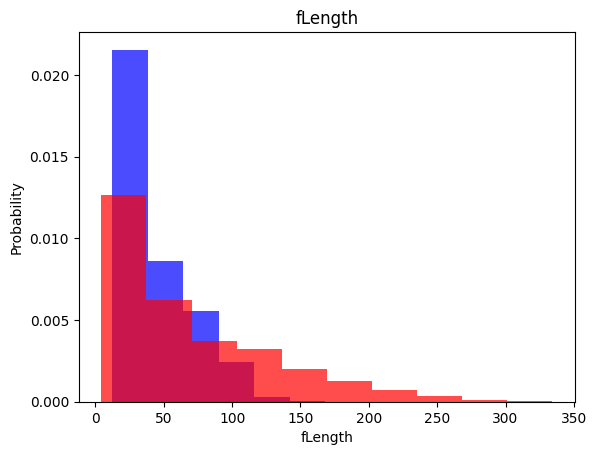

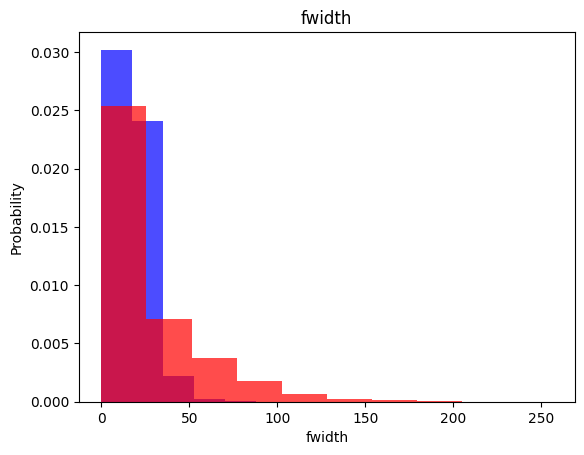

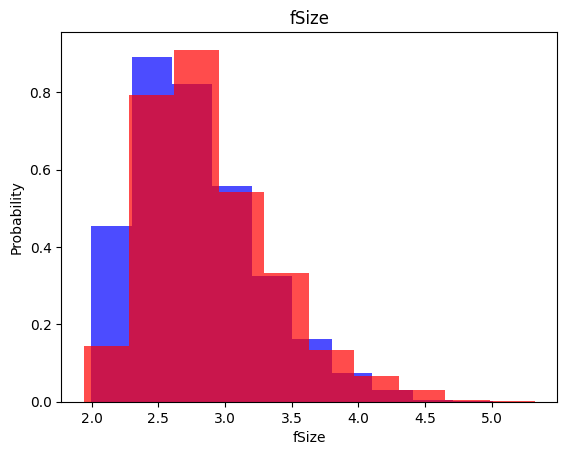

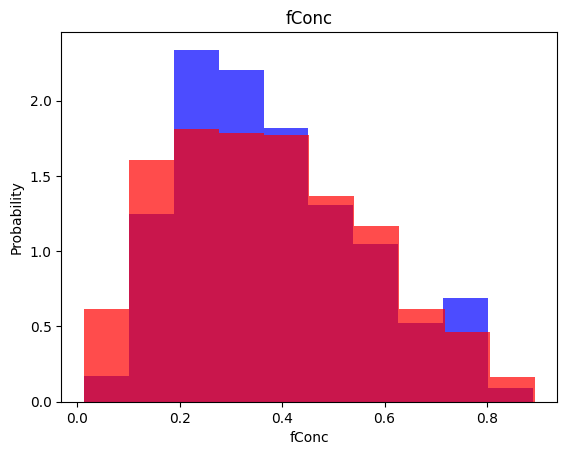

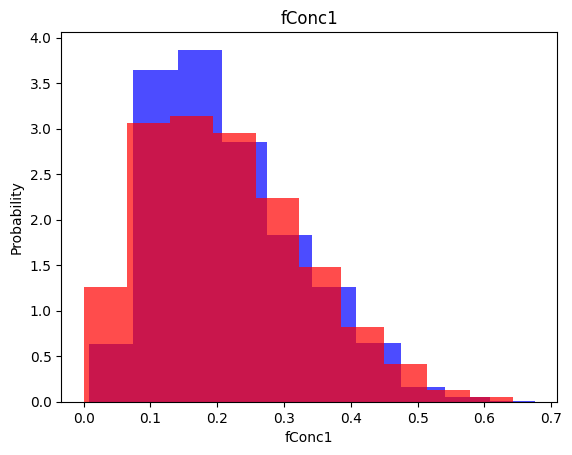

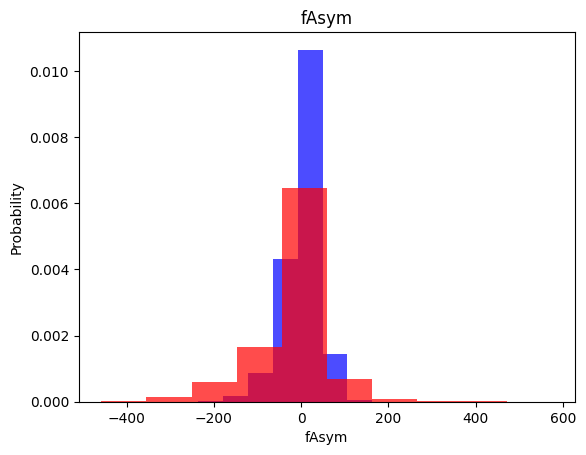

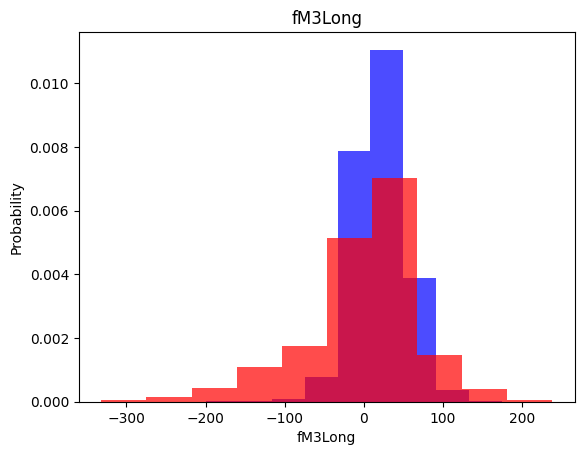

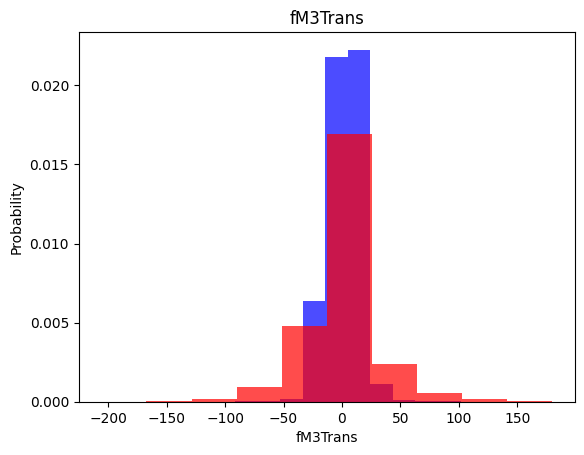

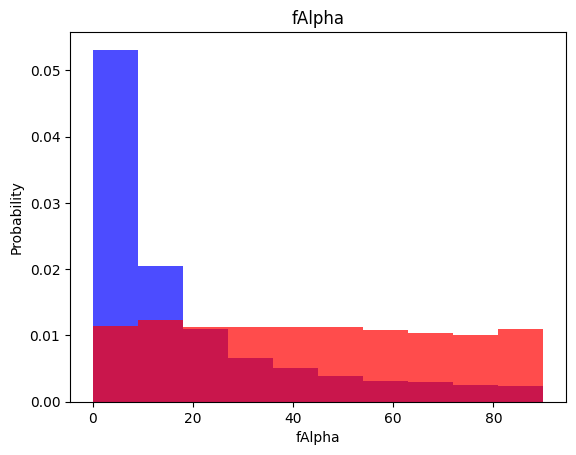

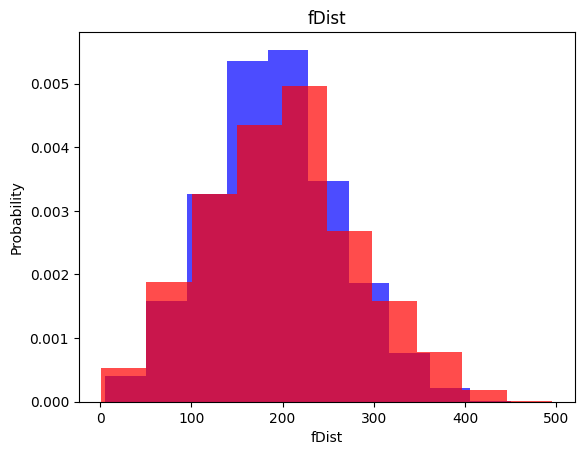

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["class"] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend
    plt.show()
    

Train, Validation and Test Datasets:

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


def scale_dataset(dataframe, overSample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X  = scaler.fit_transform(X)   #Features have varying ranges of data and needs to be scaled for prediction
    
    if overSample:
        ros = RandomOverSampler() # There is not enough Hadron data in the test data with 7:3 ratio, so a randomoversampler is used to get it balanced.
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X,np.reshape(y, (-1,1))))  # places the data in a side by side manner

    return data, X, y




/home/abhirama/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
print(len(train[train["class"] == 1])) # Gamma
print(len(train[train["class"] == 0])) # Hadrons

train, X_train, y_train = scale_dataset(train, overSample = True)  #Data set has been Scaled and Oversampled
valid, X_valid, y_valid = scale_dataset(valid, overSample = False)  #Data set has been Scaled and Oversampled
test, X_test, y_test = scale_dataset(test, overSample = False)  #Data set has been Scaled and Oversampled



7386
4026


/home/abhirama/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/abhirama/.local/lib/python3.10/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/home/abhirama/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


# kNN [k-Nearest Neighbor]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



In [10]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:

y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1310
           1       0.86      0.87      0.86      2494

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



**Precision** Talks about how many are true positives out of all the outputs labelled positive. For example, if 7 positives have been labelled, out of those 7, how many are actually positives. It is the proportion of true positives among all positive predictions made by the model.

- Works where falses positives are costly!

**Recall** is the proportion of true positive predictions out of all actual positive instances. 

- Works where false negatives are costly

Trade-off Between Precision and Recall:

High Precision, Low Recall: The model is very selective in predicting positives, leading to fewer false positives but potentially missing many true positives.

High Recall, Low Precision: The model predicts positives more generously, capturing most true positives but also including many false positives.

# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1310
           1       0.74      0.89      0.81      2494

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Log Regression


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [18]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1310
           1       0.85      0.82      0.84      2494

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.80      0.79      0.79      3804



# Support Vector Machine:

In [25]:
from sklearn.svm import SVC
import joblib


In [26]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)


In [28]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
scaler = StandardScaler()

joblib.dump(scaler, "scaler.pkl")
joblib.dump(svm_model, "svm_model.pkl")

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1310
           1       0.89      0.90      0.90      2494

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



['svm_model.pkl']

# Neural Network - Classification using TensorFlow

In [44]:
import tensorflow as tf


In [45]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()
   
    

In [46]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batchsize, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10, )),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
        
    ])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
    
    history = nn_model.fit(
    X_train, y_train, epochs = epochs, batch_size = batchsize, validation_split = 0.2, verbose = 0

)
    
    return nn_model, history


16 nodes, dropout: 0, lr: 0.005, batch size: 32


/home/abhirama/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1734116204.228027  417513 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


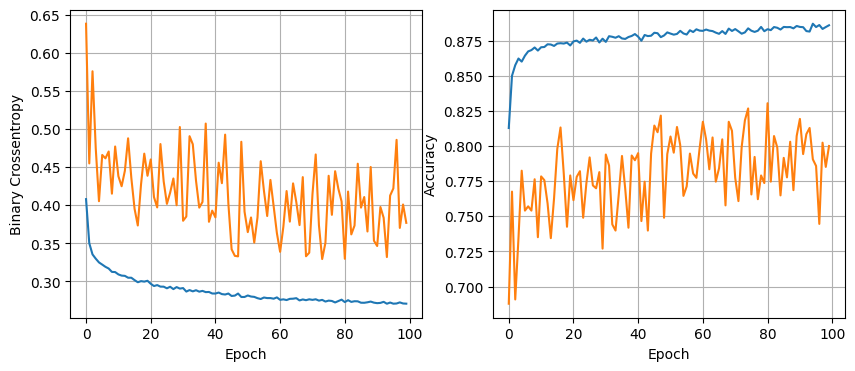

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8852 - loss: 0.2914
16 nodes, dropout: 0, lr: 0.005, batch size: 64


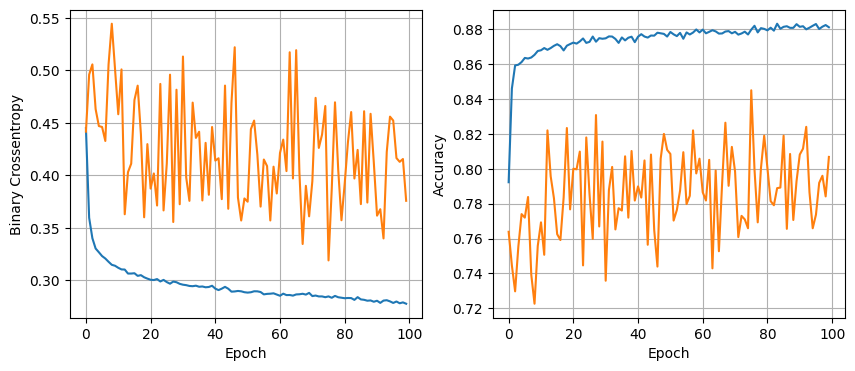

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3058
16 nodes, dropout: 0, lr: 0.005, batch size: 128


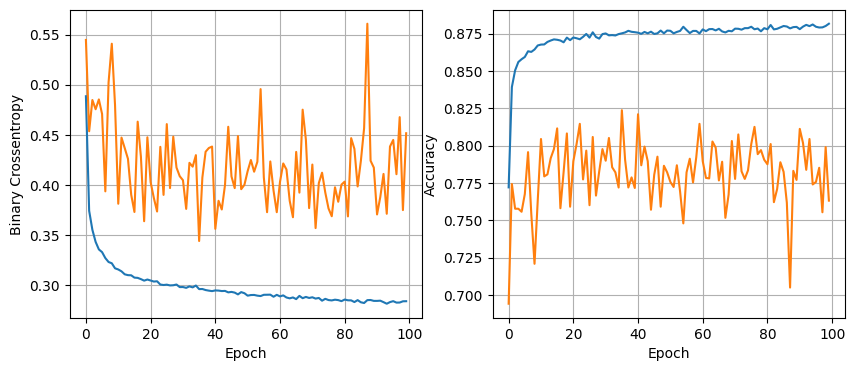

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8832 - loss: 0.2940
16 nodes, dropout: 0, lr: 0.001, batch size: 32


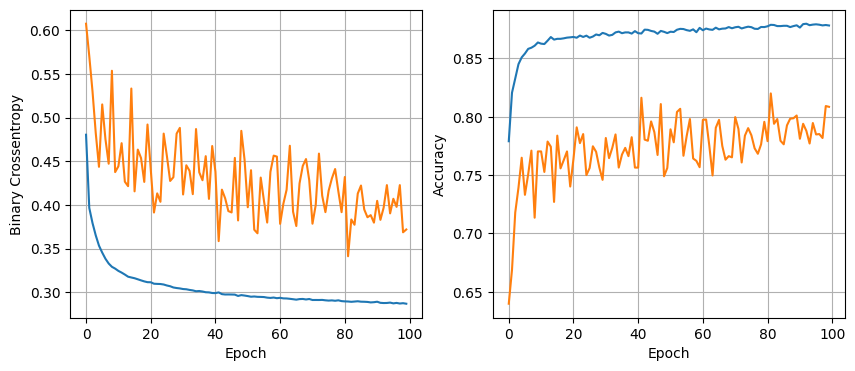

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.2849
16 nodes, dropout: 0, lr: 0.001, batch size: 64


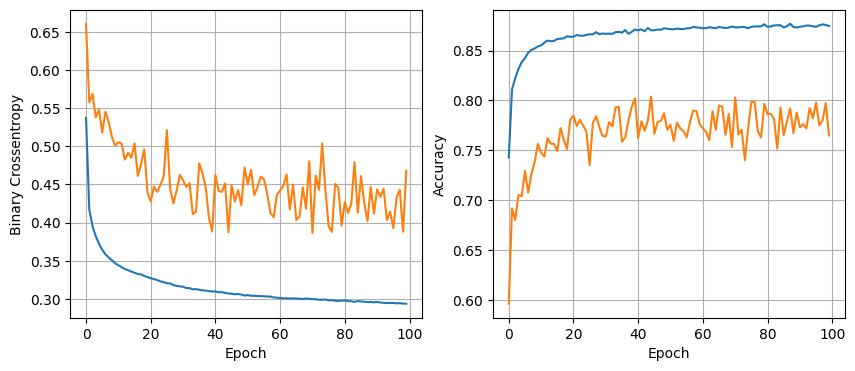

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8839 - loss: 0.2962
16 nodes, dropout: 0, lr: 0.001, batch size: 128


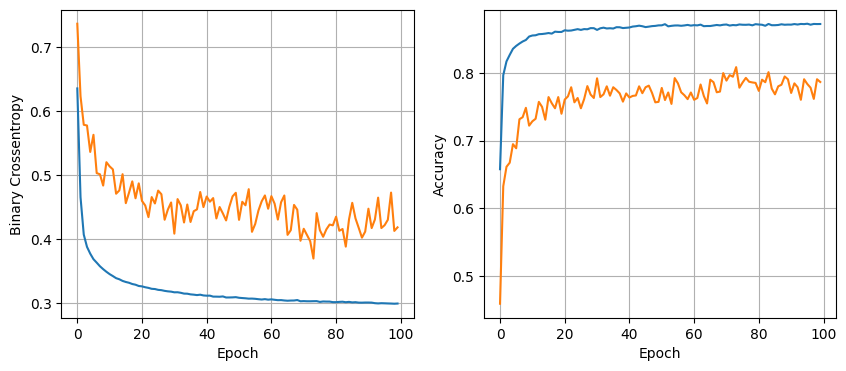

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.2955
16 nodes, dropout: 0.2, lr: 0.005, batch size: 32


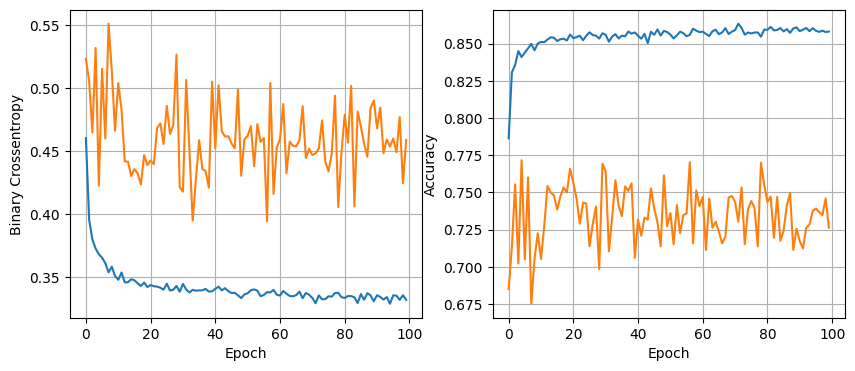

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8778 - loss: 0.3028
16 nodes, dropout: 0.2, lr: 0.005, batch size: 64


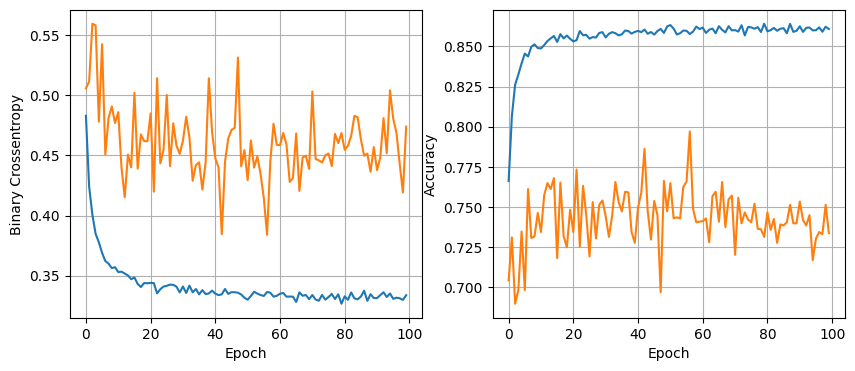

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.3049
16 nodes, dropout: 0.2, lr: 0.005, batch size: 128


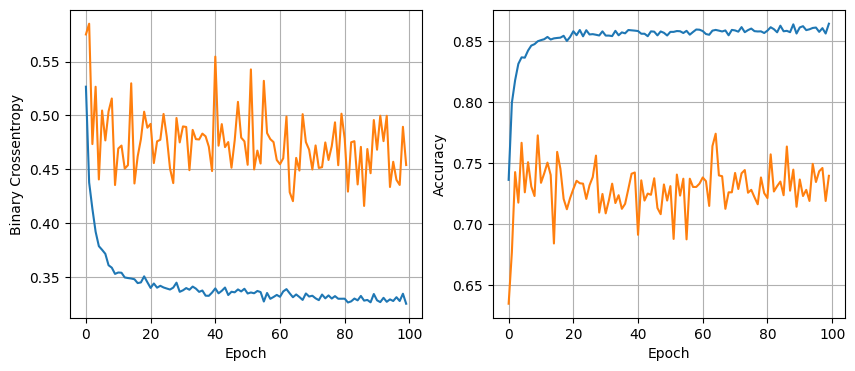

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8797 - loss: 0.2975
16 nodes, dropout: 0.2, lr: 0.001, batch size: 32


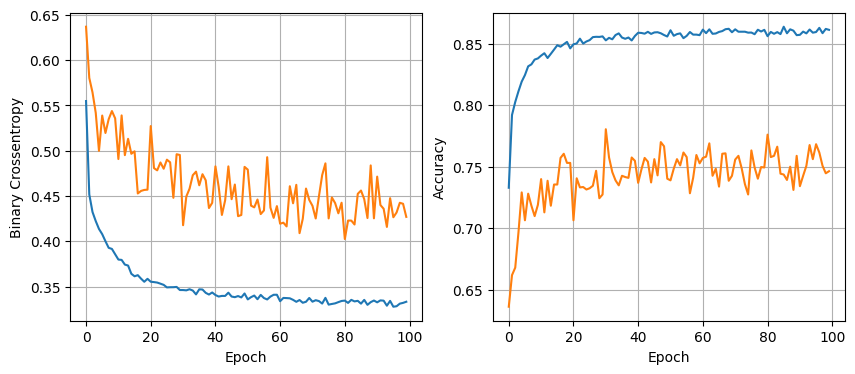

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8794 - loss: 0.2991
16 nodes, dropout: 0.2, lr: 0.001, batch size: 64


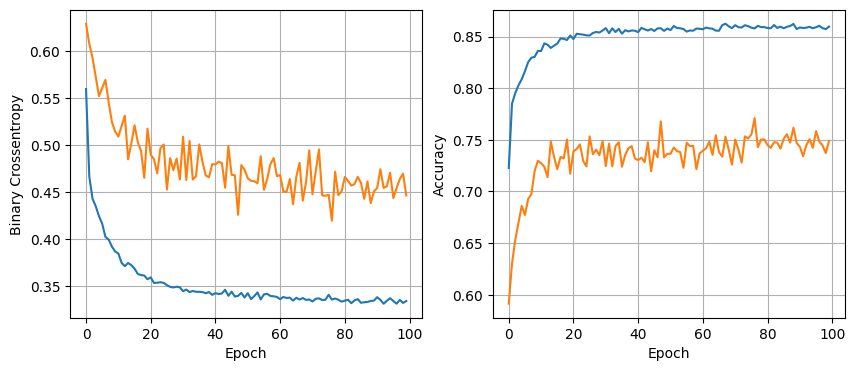

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.2973
16 nodes, dropout: 0.2, lr: 0.001, batch size: 128


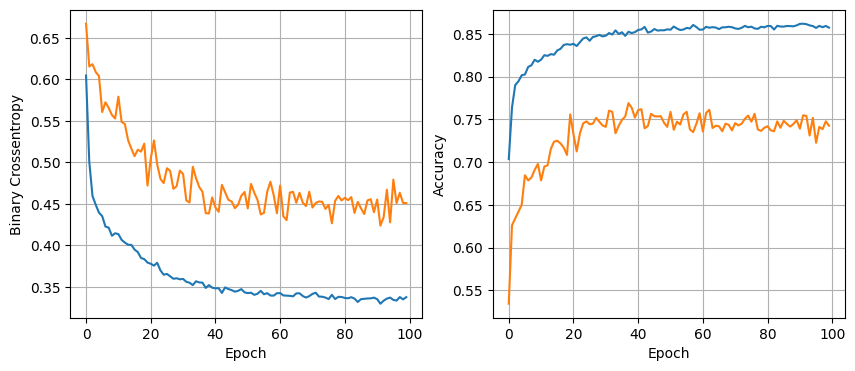

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8808 - loss: 0.2961
32 nodes, dropout: 0, lr: 0.005, batch size: 32


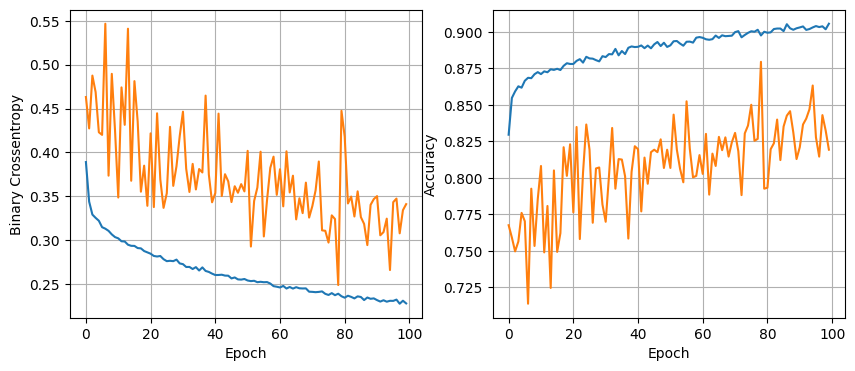

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3374
32 nodes, dropout: 0, lr: 0.005, batch size: 64


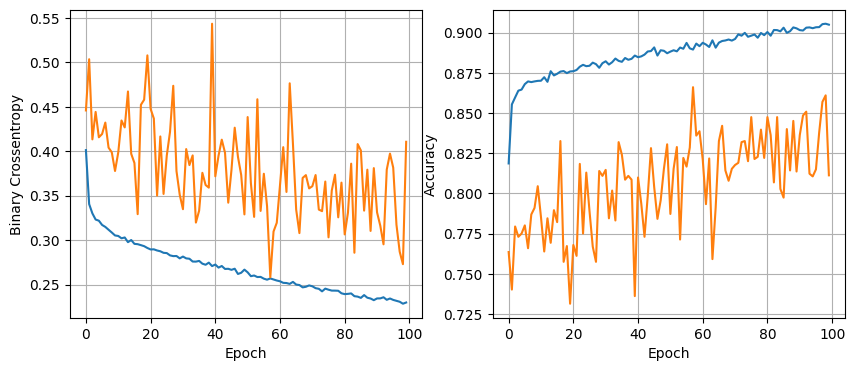

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3470
32 nodes, dropout: 0, lr: 0.005, batch size: 128


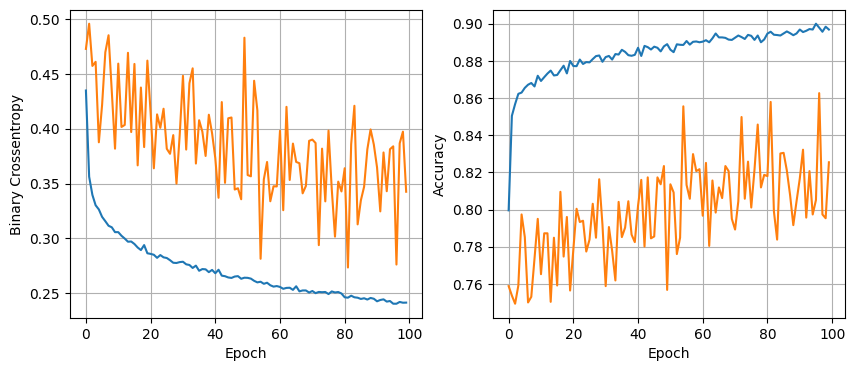

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8734 - loss: 0.3149
32 nodes, dropout: 0, lr: 0.001, batch size: 32


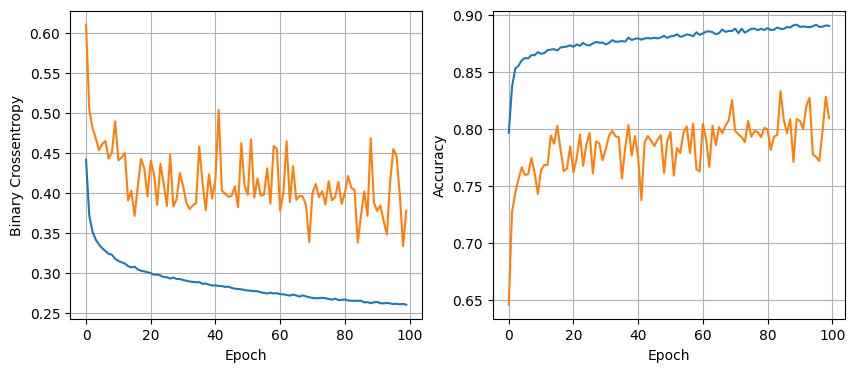

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.3036
32 nodes, dropout: 0, lr: 0.001, batch size: 64


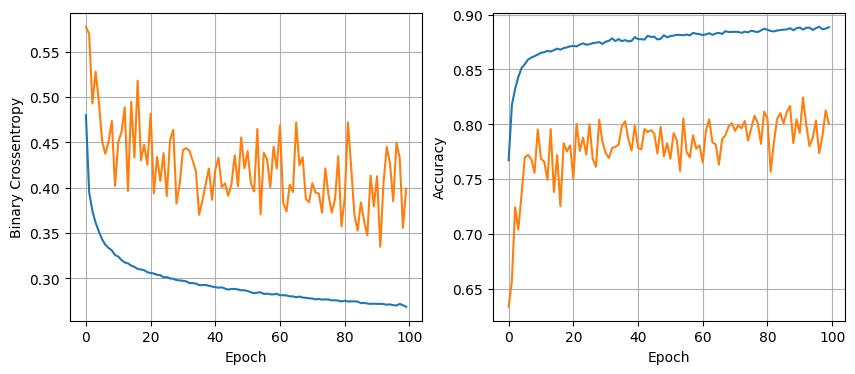

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8766 - loss: 0.2919
32 nodes, dropout: 0, lr: 0.001, batch size: 128


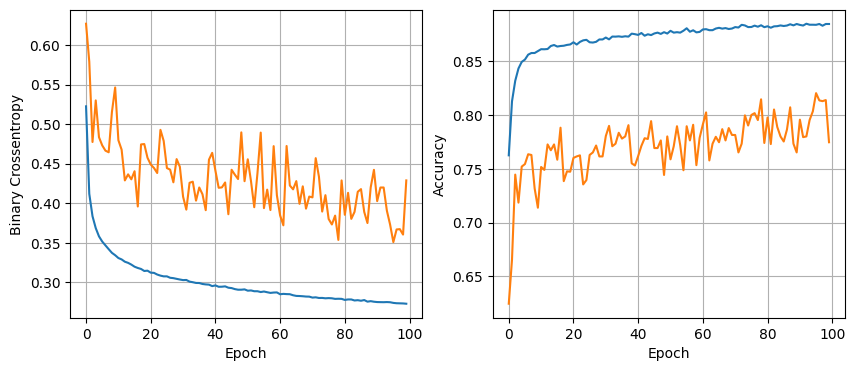

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.2868
32 nodes, dropout: 0.2, lr: 0.005, batch size: 32


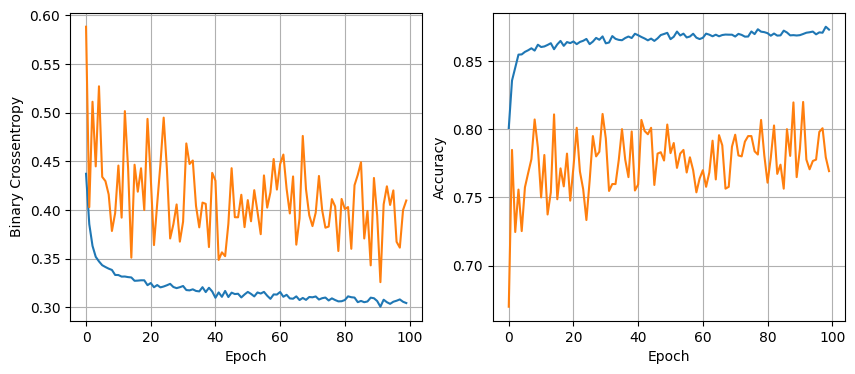

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8823 - loss: 0.2955
32 nodes, dropout: 0.2, lr: 0.005, batch size: 64


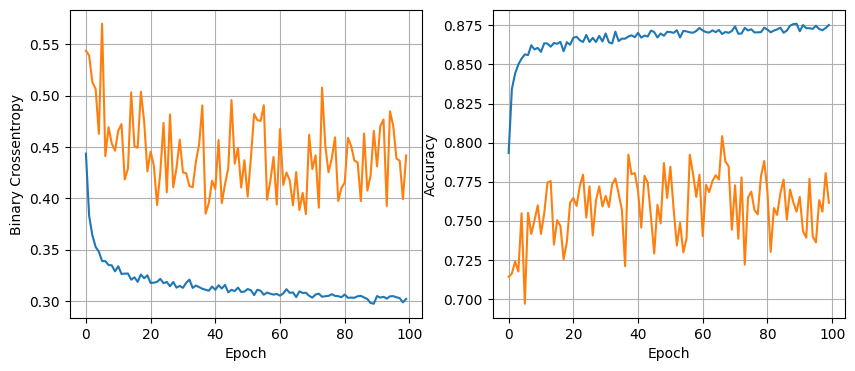

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.2989
32 nodes, dropout: 0.2, lr: 0.005, batch size: 128


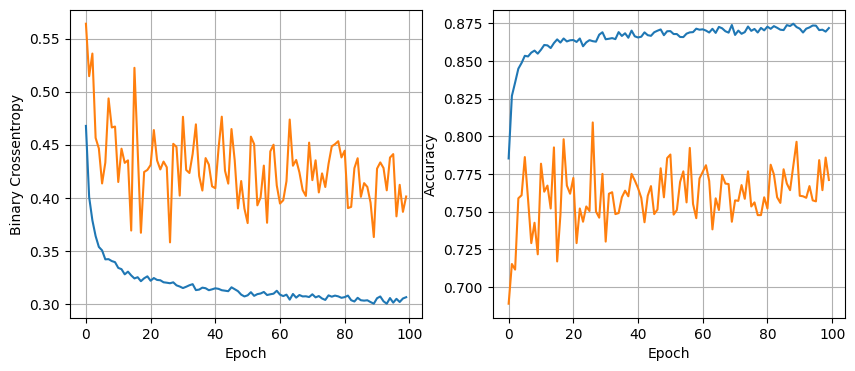

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - loss: 0.2875
32 nodes, dropout: 0.2, lr: 0.001, batch size: 32


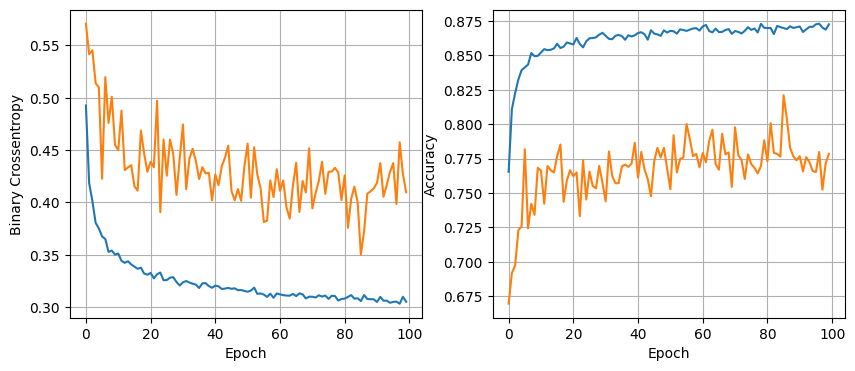

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8845 - loss: 0.2871
32 nodes, dropout: 0.2, lr: 0.001, batch size: 64


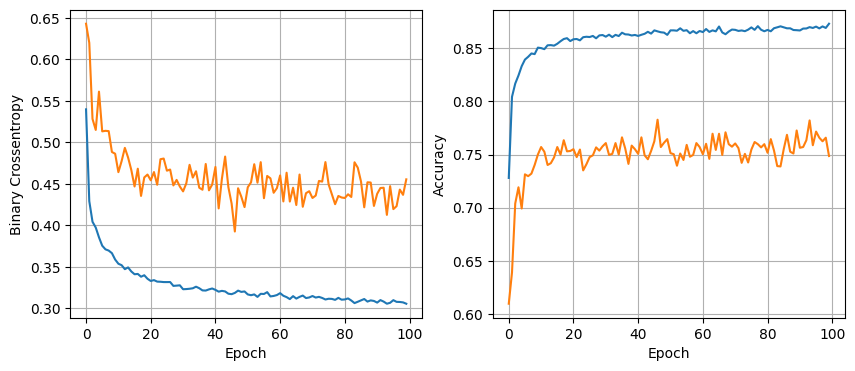

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8858 - loss: 0.2907
32 nodes, dropout: 0.2, lr: 0.001, batch size: 128


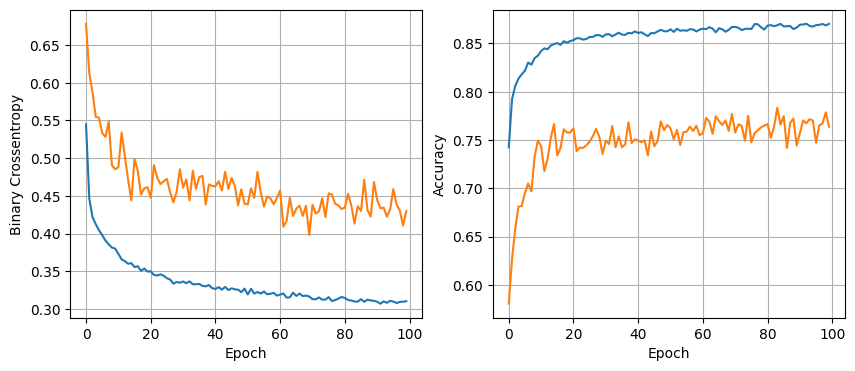

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8854 - loss: 0.2869
64 nodes, dropout: 0, lr: 0.005, batch size: 32


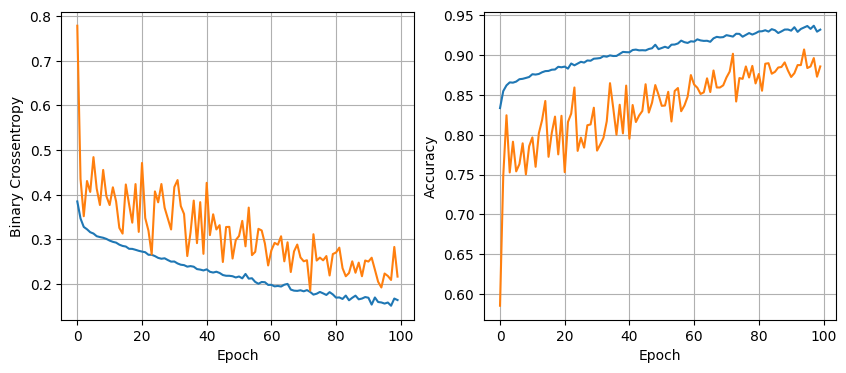

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.4964
64 nodes, dropout: 0, lr: 0.005, batch size: 64


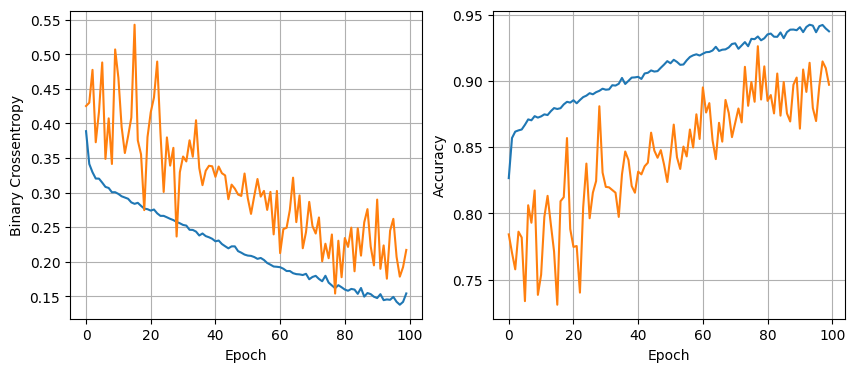

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.4958
64 nodes, dropout: 0, lr: 0.005, batch size: 128


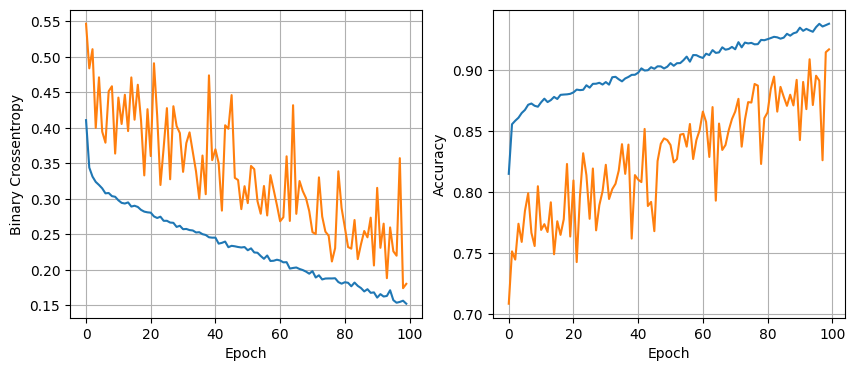

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.4458
64 nodes, dropout: 0, lr: 0.001, batch size: 32


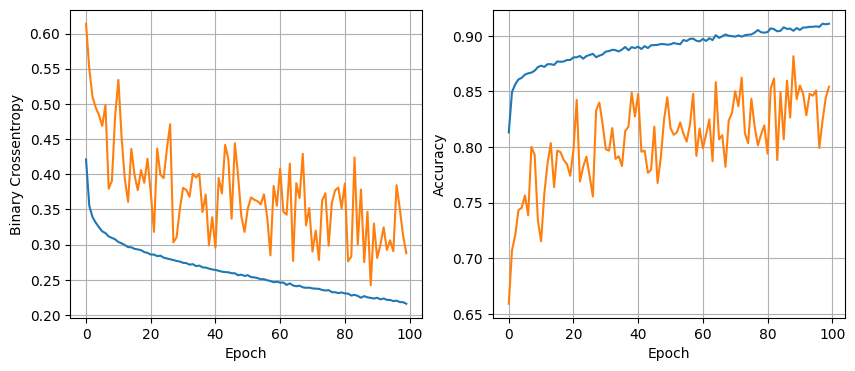

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8842 - loss: 0.3194
64 nodes, dropout: 0, lr: 0.001, batch size: 64


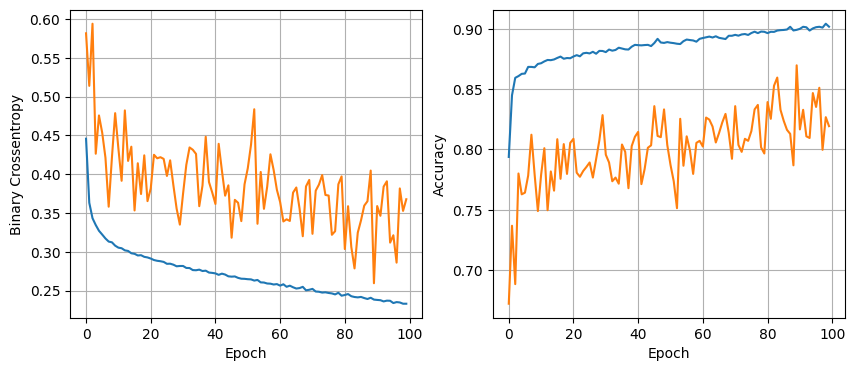

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8834 - loss: 0.3039
64 nodes, dropout: 0, lr: 0.001, batch size: 128


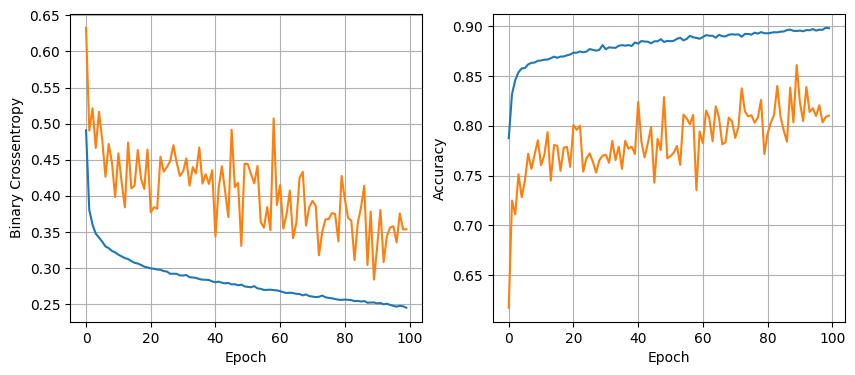

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8863 - loss: 0.2995
64 nodes, dropout: 0.2, lr: 0.005, batch size: 32


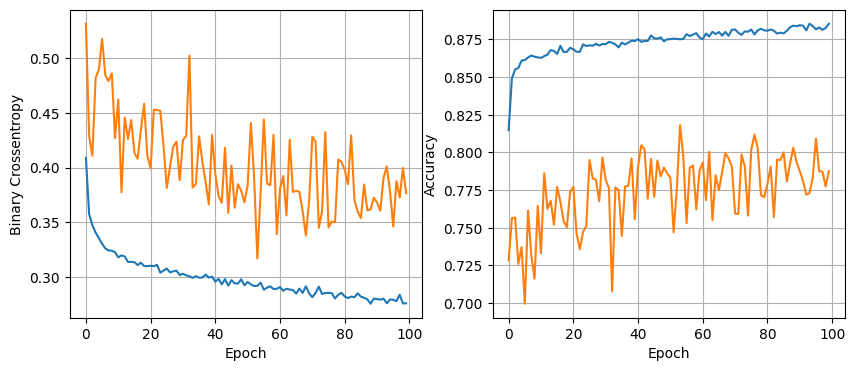

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 0.2986
64 nodes, dropout: 0.2, lr: 0.005, batch size: 64


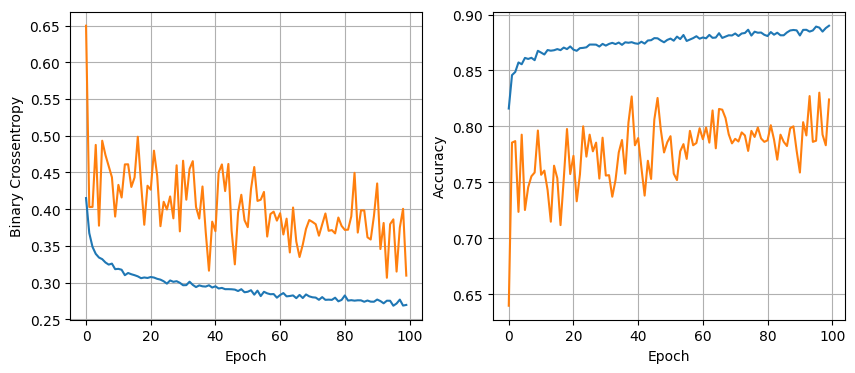

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8775 - loss: 0.2927
64 nodes, dropout: 0.2, lr: 0.005, batch size: 128


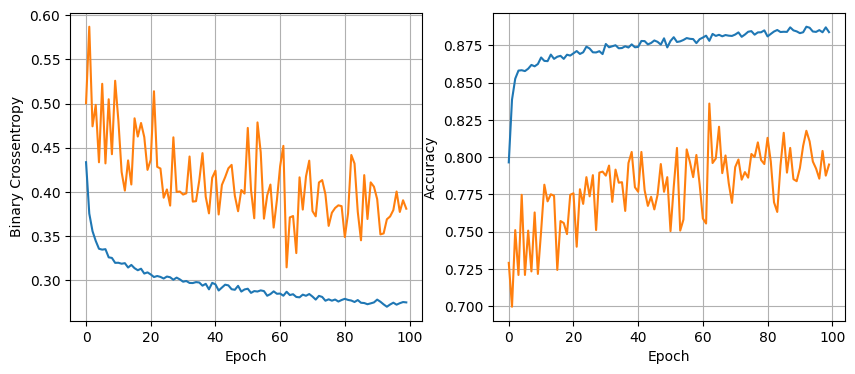

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8909 - loss: 0.2948
64 nodes, dropout: 0.2, lr: 0.001, batch size: 32


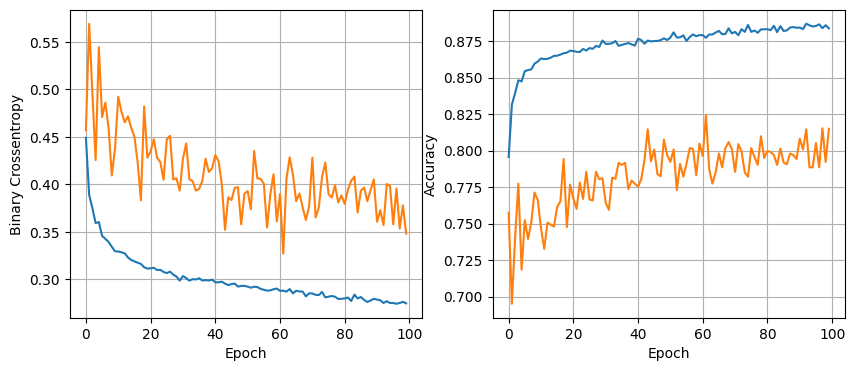

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8848 - loss: 0.2818
64 nodes, dropout: 0.2, lr: 0.001, batch size: 64


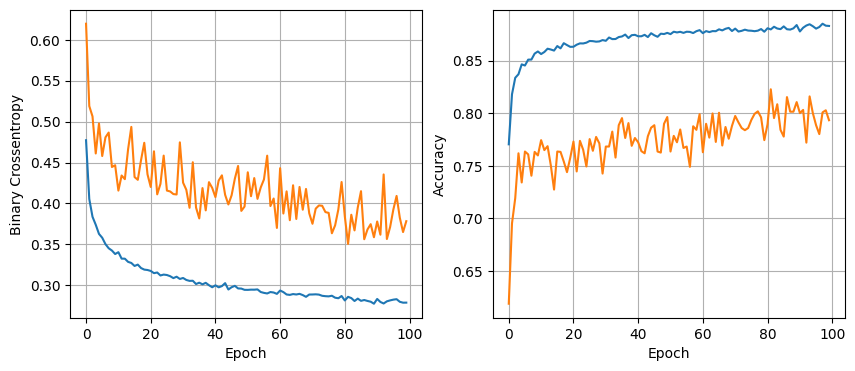

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8858 - loss: 0.2883
64 nodes, dropout: 0.2, lr: 0.001, batch size: 128


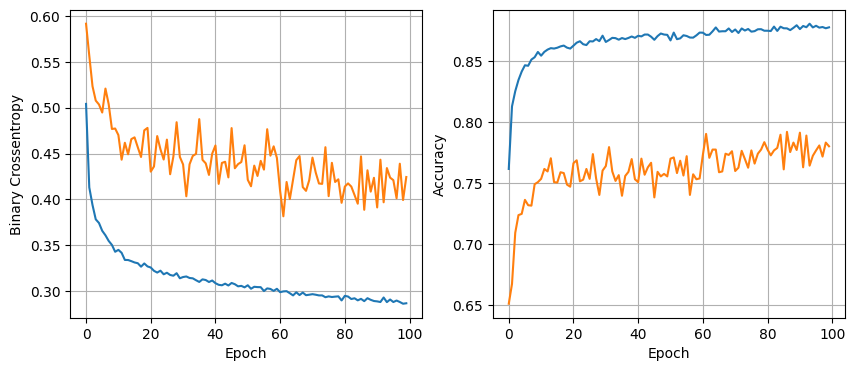

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8867 - loss: 0.2845


In [47]:
least_val_loss = float ('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout: {dropout_prob}, lr: {lr}, batch size: {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss, *other_metrics = model.evaluate(X_valid, y_valid)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [49]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).astype(int).reshape(-1, )
least_loss_model.save('model.h5')

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step


In [50]:
print(classification_report(y_test, y_pred))
least_loss_model.save('model.h5')


              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1319
           1       0.89      0.91      0.90      2485

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

